<a href="https://colab.research.google.com/github/TrinetraBanerjee/Images_Captioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install transformers

In [3]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer ,GPT2TokenizerFast
import torch
from PIL import Image

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

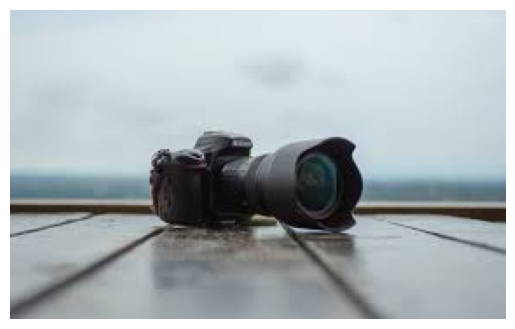

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Generated Caption (GPT-2 Tokenizer): a camera sitting on top of a wooden surface 
--------------------------------------------------


In [5]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer, GPT2TokenizerFast
import matplotlib.pyplot as plt

# Load the model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
vit_tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
gpt_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length =20 # Adjust max_length for longer captions
num_beams = 10
gen_kwargs = {"max_length": max_length, "num_beams": num_beams, "early_stopping": False}  # Enable early stopping for beam search

def predict_step(image_paths):
    captions = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(i_image)
        ax.axis("off")
        plt.show()

        # Preprocess the image
        images = [i_image]
        pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values.to(device)

        # Generate captions
        with torch.no_grad():
            output_ids = model.generate(pixel_values, **gen_kwargs)

        # Decode the generated caption using GPT-2 tokenizer
        cap = gpt_tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
        captions.append(cap)

    return captions

# Example usage
captions = predict_step(['/content/download.jpeg'])
for cap in captions:
    print("Generated Caption (GPT-2 Tokenizer):", cap)
    print("-" * 50)
